<a href="https://colab.research.google.com/github/Shaw-71nc/-Shaw-71nc-Predicting_Heart_Disease_using_machine_learning/blob/main/Predicting_Heart_Disease_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease using machine learning
this notebook looks into using various python based machine learning and
data science libraries in an attempt to build a machine leanring model
capable of predicting wether  or not someone has heart disease on there medical attributes

we are going to take the fillowing approch:

    1.problem defination
    2.data
    3.evaluation
    4.feature
    5.modelling
    6.experimenting
    

## 1. Problem defination

given clinical parameters about a patient, can we predict weather of not they have heart disease

## 2. DATA
get in from UCI kagle heart disease
link-- https://www.kaggle.com/ronitf/heart-disease-uci

## 3.Evaluation
if we can reach 95% accuracy of predicting weather or not a patient has heart disease during the proof or concept
we"ll parsue the project

## 4. Feature
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
In particular,the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4.

Attribute Information:

    1.age - age in years
    2.sex - (1 = male; 0 = female)
    3.cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    5.chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglyceridesabove 200 is cause for concern
        
    6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    7.restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    8.thalach - maximum heart rate achieved
    9.exang - exercise induced angina (1 = yes; 0 = no)
    10.oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress                      more
    11.slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    12.ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    13.thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 5. Model evaluation

prepairing the tools
we are going to use Pandas,matplotlib,sklearn,numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appear in notebook
%matplotlib inline

# model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evalutation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Data import 

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving 6.1 heart-disease.csv to 6.1 heart-disease.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['6.1 heart-disease.csv']))

## Data Explorarton (Exploration dta analysis or EDA)

In [5]:
# lets find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

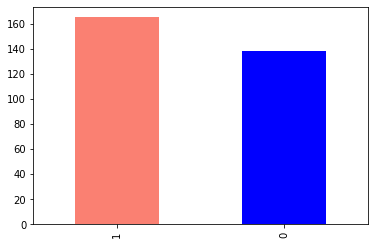

In [6]:
# visualisation of data 
df["target"].value_counts().plot(kind="bar", color=["salmon", "blue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum() # there is no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# hearty disease frequency accuracy to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# putting into crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

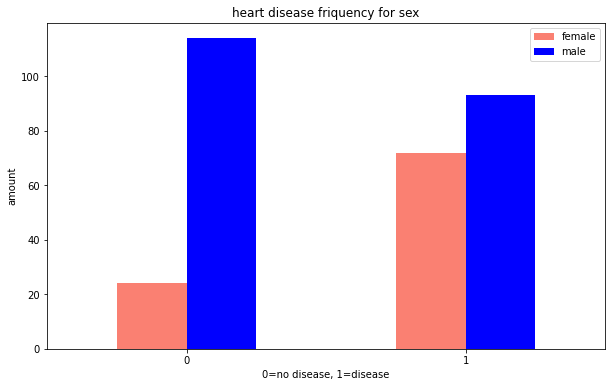

In [12]:
# visualition
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "blue"])

plt.title("heart disease friquency for sex")
plt.xlabel("0=no disease, 1=disease")
plt.ylabel("amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0)

## age vs. max heart rate for heart disease

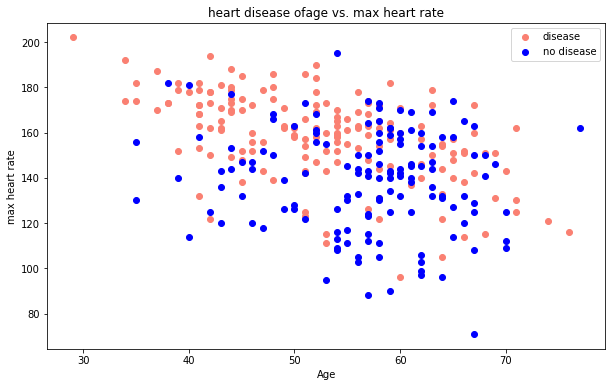

In [13]:
# creat another fig
plt.figure(figsize=(10,6))

# scatter with poseyive example
plt.scatter (df.age[df.target==1], df.thalach[df.target==1],c="salmon" )

#scatter withe nagative examples
plt.scatter (df.age[df.target==0], df.thalach[df.target==0], c="blue")

plt.title("heart disease ofage vs. max heart rate")
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.legend(["disease", "no disease"]);

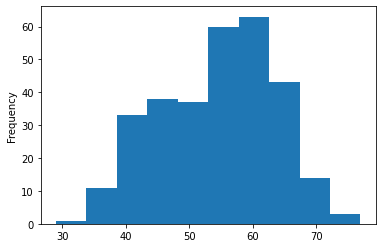

In [14]:
# cheak the distributation of age colom with histgram
df.age.plot.hist()

# Heart disease frequency per chest pain type

3.cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

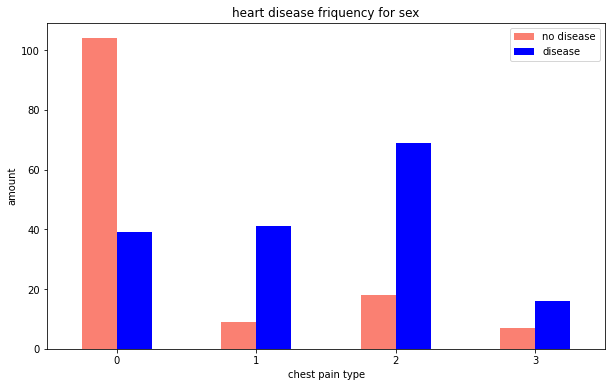

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "blue"])

plt.title("heart disease friquency for sex")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease", "disease"])
plt.xticks(rotation=0)

In [17]:
# make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


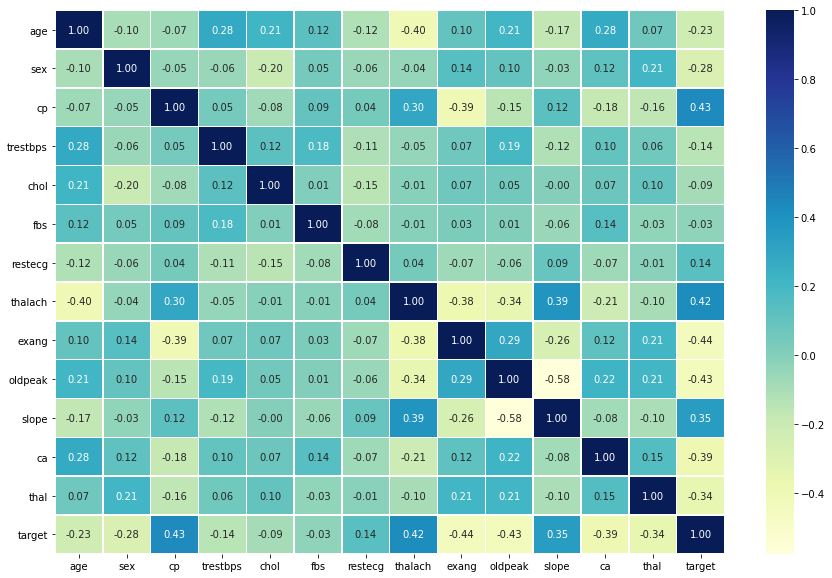

In [18]:
# visuadal correlation matrix
corr_mat=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat, annot= True,
               linewidths=0.5, fmt=".2f",
               cmap="YlGnBu");

# Pipeline machine learning

In [19]:
## modeling 
x= df.drop("target", axis=1)
y= df["target"]

np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

Now wwe have got our data split into training and test et,it is time to build  a macine learning model.

* we will train it on the traning set.
* we will test it on the test set.
* we have gioing to try 3 different machine klearning models.

1. Logistic regreession 
2. K-Nearest neighbours classifire
3. Random Forest classifire


In [20]:
# put models in a dictionary

models={"Logistic Regresssion": LogisticRegression(), "KNN": KNeighborsClassifier(), "RandomForest": RandomForestClassifier()}

#creat a funtion o fit and score

def fit_and_score(models,x_train, x_test, y_train, y_test):
    """
    fit and evaluate given macine learning model
    models: a dictionary of differint sklearn mavhine leaning model
    x_train, y_train: trainig data
    x_test, y_test: testing data
    
    """
    np.random.seed(42)
    model_score={}
    #loop through model:
    for name,model in models.items():
        #fill the model
        model.fit(x_train, y_train)
        model_score[name]= model.score(x_test, y_test)
    return model_score  

In [21]:
model_score=fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regresssion': 0.8852459016393442,
 'RandomForest': 0.8360655737704918}

### now we have get the baseline, we kmnow a model first predction are not alwayes what we should based our nest step

1. hyperparameters
2. Feature imporvement
3. confusion matrix
4. cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC cruve
10. Area Under Curve(AUC)

In [22]:
train_scores=[]
test_scores=[]

# creat a list of different value for n_neighbors
neighbors=range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbor
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train,y_train))
    
    #update the test scors list
    test_scores.append(knn.score(x_test, y_test))
    


Maximum KNN score on the test data:75.41%


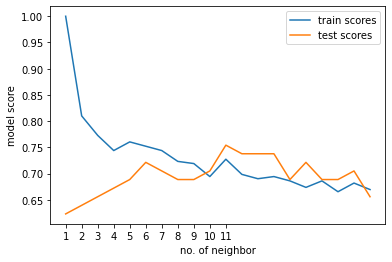

In [23]:
plt.plot(neighbors, train_scores, label="train scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.xticks(np.arange(1,12,1))
plt.xlabel("no. of neighbor")
plt.ylabel("model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

# Hyperparameters tuning by RandomsearchCV

we are going to tune
* Logistic Regression()
* RandomForestClassifire()

......... using RandomizedSearcCV

In [24]:
log_reg_grid={"C":np.logspace(-4, 4, 20)}

# create a hyperparameter grid for randomforest

rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth": [None, 3,5,10]}




NOW we have got hyperparameters grid setup for each of our models, lets tune them usinig RandomsearchCV

In [25]:
# tune logisticregression

np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=50,
                              verbose=True)

# fit random hyperparameters search model
rs_log_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C':...03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478

In [26]:
rs_log_reg.best_params_

{'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## now do it for RandomForestClassifire

In [28]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
rs_rf.best_params_

{'max_depth': 3, 'n_estimators': 560}

In [30]:
rs_rf.score(x_test, y_test)

0.8852459016393442

# Hyperparameter uning by GridSearchCV

In [31]:
log_reg_grid={"C":np.logspace(-4, 4, 20),
              "solver":["liblinear"]}


In [32]:
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        n_jobs=30,
                        verbose=True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 100 out of 100 | elapsed:   19.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=30,
             param_grid={'C': array([1.00000000e-04, 2.636...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [33]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

# Evaluating our tuned machine learning model: beyound accuracy

confusion matrix

cross-validation

Precision

Recall

F1 score

Classification Report

ROC cruve

Area Under Curve(AUC)








# Make prediction with tuned model

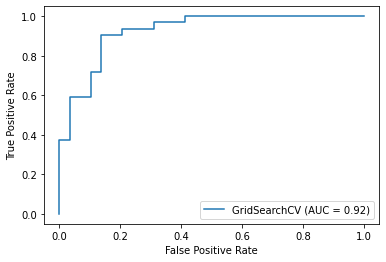

In [34]:
y_preds= gs_log_reg.predict(x_test)

# plot ROC curve and calculate

plot_roc_curve(gs_log_reg, x_test, y_test)

# Confusion matrix

In [35]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


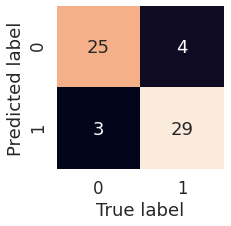

In [36]:
sns.set(font_scale=1.5)
def conf_mat_map (y_test, y_preds):
  fig, ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)

  plt.xlabel("True label")
  plt.ylabel("Predicted label")

conf_mat_map(y_test, y_preds)

# Classification Report

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Claculate evaluted matrix using cross validation 

In [38]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

## creating a new classification with best params

In [39]:
clf= LogisticRegression(C= 0.23357214690901212, solver= 'liblinear')

# Cross val accuracy

In [40]:
cv_acc= np.mean(cross_val_score(clf, x, y, cv=5, scoring="accuracy"))
cv_acc

0.8479781420765027

## Cross val precision

In [41]:
cv_precision= np.mean(cross_val_score(clf, x, y, cv=5, scoring="precision"))
cv_precision

0.8215873015873015

## Cross val Recall

In [42]:
cv_recall= np.mean(cross_val_score(clf, x, y, cv=5, scoring="recall"))
cv_recall

0.9272727272727274

## Cross val f1

In [43]:
cv_f1= np.mean(cross_val_score(clf, x, y, cv=5, scoring="f1"))
cv_f1

0.8705403543192143

# Visualization cross validation metrics

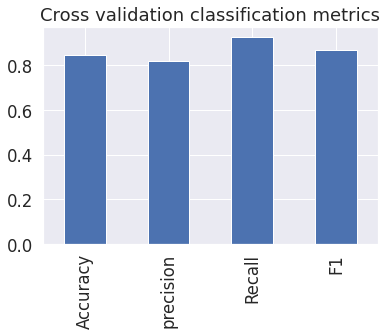

In [44]:
cv_matrix=pd.DataFrame({"Accuracy":cv_acc,
                        "precision":cv_precision,
                        "Recall":cv_recall,
                        "F1":cv_f1},
                       index=[0])

cv_matrix.T.plot.bar(title="Cross validation classification metrics", legend=False);

# Feature Importence

feature importence is as asking "which feature contributies most to the outcomes of the model and how did they contribute"

finding feature impoertence is different for each machine learning model

In [46]:
# fit an instance of logisticRegression

clf=LogisticRegression(C =0.23357214690901212, solver="liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# cheak coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [48]:
# match coef of features to columns
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict


{'age': 0.003699220776580221,
 'ca': -0.6516534770577476,
 'chol': -0.0017036439067759743,
 'cp': 0.6747282587404362,
 'exang': -0.6312040612837573,
 'fbs': 0.047876881148997324,
 'oldpeak': -0.5759095045469952,
 'restecg': 0.3349019815885189,
 'sex': -0.9042409028785717,
 'slope': 0.4709514073081419,
 'thal': -0.6998420764664995,
 'thalach': 0.02472938284108309,
 'trestbps': -0.011613401339975146}

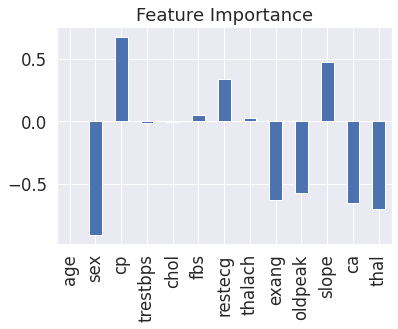

In [53]:
# vasualize the feature importence

feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [54]:
pd.crosstab(df['sex'],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


# Experimentation 

if ypu haven't hit your evaluation metrics yet, than ask yourself...
* could you get or collect more data?
* could you try better model? like XGBoost and CatBoost?
* could you improve the current miodel?
* if your model is good enough , how would you share it?